In [5]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('US_Dew.csv', index_col=0, parse_dates=True)
df.index.freq = 'D'
df.head()

,Cases,Dew Point
Date,,
2020-03-01,20,-1.629630
2020-03-02,14,-2.382716
2020-03-03,22,-3.820988
2020-03-04,34,-2.975309
2020-03-05,74,-5.716049


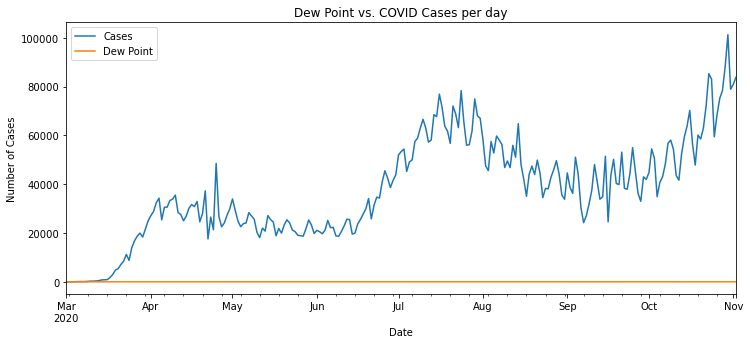

In [6]:
title = 'Dew Point vs. COVID Cases per day'
ylabel='Number of Cases'
xlabel=''

ax = df['Cases'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['Dew Point'].plot(legend=True);

In [7]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [8]:
adf_test(df['Cases'],title='Cases')

Augmented Dickey-Fuller Test: Cases
ADF test statistic       -1.238645
p-value                   0.656755
# lags used              13.000000
# observations          233.000000
critical value (1%)      -3.458731
critical value (5%)      -2.874026
critical value (10%)     -2.573424
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [9]:
adf_test(df['Dew Point'], title='Dew')

Augmented Dickey-Fuller Test: Dew
ADF test statistic       -2.030980
p-value                   0.273157
# lags used               4.000000
# observations          242.000000
critical value (1%)      -3.457664
critical value (5%)      -2.873559
critical value (10%)     -2.573175
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [10]:
df_transformed = df.diff()

In [11]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['Cases'], title='CasesFirstDiff')
print()
adf_test(df_transformed['Dew Point'], title='DewFirstDiff')

Augmented Dickey-Fuller Test: CasesFirstDiff
ADF test statistic       -2.772410
p-value                   0.062324
# lags used              12.000000
# observations          233.000000
critical value (1%)      -3.458731
critical value (5%)      -2.874026
critical value (10%)     -2.573424
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary

Augmented Dickey-Fuller Test: DewFirstDiff
ADF test statistic     -1.106938e+01
p-value                 4.594316e-20
# lags used             3.000000e+00
# observations          2.420000e+02
critical value (1%)    -3.457664e+00
critical value (5%)    -2.873559e+00
critical value (10%)   -2.573175e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [12]:
df_transformed = df_transformed.diff().dropna()
adf_test(df_transformed['Cases'], title='CasesSecondDiff')
print()
adf_test(df_transformed['Dew Point'], title='DewSecondDiff')

Augmented Dickey-Fuller Test: CasesSecondDiff
ADF test statistic     -6.486413e+00
p-value                 1.257669e-08
# lags used             1.100000e+01
# observations          2.330000e+02
critical value (1%)    -3.458731e+00
critical value (5%)    -2.874026e+00
critical value (10%)   -2.573424e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: DewSecondDiff
ADF test statistic     -8.337049e+00
p-value                 3.251096e-13
# lags used             1.400000e+01
# observations          2.300000e+02
critical value (1%)    -3.459106e+00
critical value (5%)    -2.874190e+00
critical value (10%)   -2.573512e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [13]:
nobs=7
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [14]:
from statsmodels.tsa.api import VAR
for i in range(31):
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 0
AIC:  21.651759848567707
BIC:  21.68093859372461

Order = 1
AIC:  21.244904183348456
BIC:  21.33270317426327

Order = 2
AIC:  20.91721648659807
BIC:  21.06398902070932

Order = 3
AIC:  20.753918598301368
BIC:  20.960021565101446

Order = 4
AIC:  20.62417589321907
BIC:  20.889969825169665

Order = 5
AIC:  20.49130669814051
BIC:  20.81715582251152

Order = 6
AIC:  20.225391415425417
BIC:  20.611663707077675

Order = 7
AIC:  19.953491884044354
BIC:  20.400559119177057

Order = 8
AIC:  19.88327747014166
BIC:  20.391515281025956

Order = 9
AIC:  19.80954200436564
BIC:  20.37932993508643

Order = 10
AIC:  19.736147147308696
BIC:  20.367868710537145

Order = 11
AIC:  19.73780844712513
BIC:  20.43185118194515

Order = 12
AIC:  19.73720977605789
BIC:  20.493965306870344

Order = 13
AIC:  19.725106202710617
BIC:  20.544970299239676

Order = 14
AIC:  19.728788304246297
BIC:  20.61216094267305

Order = 15
AIC:  19.743502204436073
BIC:  20.690787629685072

Order = 16
AIC:  19.723757174139

In [15]:
results = model.fit(18)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 30, Nov, 2020
Time:                     16:27:22
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    20.7177
Nobs:                     220.000    HQIC:                   20.0372
Log likelihood:          -2703.72    FPE:                3.19632e+08
AIC:                      19.5762    Det(Omega_mle):     2.34223e+08
--------------------------------------------------------------------
Results for equation Cases
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const               148.839289       355.338741            0.419           0.675
L1.Cases             -1.626329         0.072850          -22.324           0.000
L1.Dew Point         43.115407       122.164806            0

In [16]:
lag_order = results.k_ar
lag_order

18

In [17]:
z = results.forecast(y=train.values[-lag_order:], steps=7)
z

array([[ 7.68269635e+02,  4.90320596e+00],
       [-7.11361634e+03, -1.40070713e+00],
       [ 6.19744801e+03,  3.17775870e+00],
       [ 5.75509748e+03, -1.88039704e+00],
       [-3.08404026e+04,  1.61008521e-01],
       [ 8.88330373e+03, -7.07165081e-01],
       [ 9.52415640e+03, -1.41021154e+00]])

In [18]:
test

,Cases,Dew Point
Date,,
2020-10-27,-2149.0,4.605556
2020-10-28,-3528.0,4.238889
2020-10-29,6517.0,1.450000
2020-10-30,3384.0,-4.027778
2020-10-31,-35482.0,0.294444
2020-11-01,24406.0,-8.461110
2020-11-02,815.0,8.061110


In [19]:
idx = pd.date_range('27/10/2020', periods=7, freq='D')
df_forecast = pd.DataFrame(z, index=idx, columns=['Cases2d','Dew2d'])
df_forecast

,Cases2d,Dew2d
2020-10-27,768.269635,4.903206
2020-10-28,-7113.616340,-1.400707
2020-10-29,6197.448015,3.177759
2020-10-30,5755.097480,-1.880397
2020-10-31,-30840.402557,0.161009
2020-11-01,8883.303731,-0.707165
2020-11-02,9524.156399,-1.410212


In [20]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Cases1d'] = (df['Cases'].iloc[-nobs-1]-df['Cases'].iloc[-nobs-2]) + df_forecast['Cases2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['CasesForecast'] = df['Cases'].iloc[-nobs-1] + df_forecast['Cases1d'].cumsum()

In [21]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Dew1d'] = (df['Dew Point'].iloc[-nobs-1]-df['Dew Point'].iloc[-nobs-2]) + df_forecast['Dew2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['DewForecast'] = df['Dew Point'].iloc[-nobs-1] + df_forecast['Dew1d'].cumsum()

In [22]:
df_forecast

,Cases2d,Dew2d,Cases1d,CasesForecast,Dew1d,DewForecast
2020-10-27,768.269635,4.903206,9687.269635,78046.269635,-0.113461,-9.419017
2020-10-28,-7113.616340,-1.400707,2573.653294,80619.922929,-1.514168,-10.933185
2020-10-29,6197.448015,3.177759,8771.101309,89391.024238,1.663591,-9.269595
2020-10-30,5755.097480,-1.880397,14526.198789,103917.223027,-0.216807,-9.486401
2020-10-31,-30840.402557,0.161009,-16314.203768,87603.019259,-0.055798,-9.542199
2020-11-01,8883.303731,-0.707165,-7430.900037,80172.119222,-0.762963,-10.305162
2020-11-02,9524.156399,-1.410212,2093.256362,82265.375584,-2.173175,-12.478337


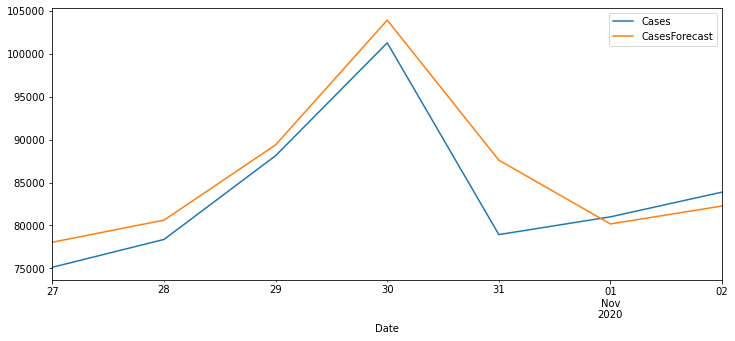

In [23]:
df['Cases'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['CasesForecast'].plot(legend=True);